In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB


In [2]:
df = pd.read_csv('bug_data.csv')
df.head()
df.dropna(inplace=True)

In [3]:
from sklearn.utils import resample
normal =df[df.severity=='normal']
major =df[df.severity=='major']
minor =df[df.severity=='minor']
blocker =df[df.severity=='blocker']
trivial =df[df.severity=='trivial']
critical =df[df.severity=='critical']
enhancement =df[df.severity=='enhancement']

def resample_df(df):
    return resample(df,replace=True,n_samples=30000)

normal =resample_df(normal)
major =resample_df(major)
minor =resample_df(minor)
blocker =resample_df(blocker)
trivial =resample_df(trivial)
critical =resample_df(critical)
enhancement =resample_df(enhancement)

df = pd.concat([major,critical,minor,blocker,normal,trivial,enhancement])


df.severity.value_counts()


major          30000
critical       30000
minor          30000
blocker        30000
normal         30000
trivial        30000
enhancement    30000
Name: severity, dtype: int64

In [4]:
df.severity.value_counts()


major          30000
critical       30000
minor          30000
blocker        30000
normal         30000
trivial        30000
enhancement    30000
Name: severity, dtype: int64

In [5]:
# Vectorize text
vectorizer = TfidfVectorizer()

%time X = vectorizer.fit_transform(df['description'])
y = df['severity']


CPU times: user 2.42 s, sys: 36 ms, total: 2.46 s
Wall time: 2.46 s


In [6]:


# Preprocess the text data
# df['description'] = df['description'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# # Vectorize the text data
# vectorizer = TfidfVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

# Train the decision tree model
model = DecisionTreeClassifier(class_weight='balanced')
%time model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


CPU times: user 2min 50s, sys: 19.8 ms, total: 2min 50s
Wall time: 2min 50s
              precision    recall  f1-score   support

     blocker       0.90      1.00      0.94      6051
    critical       0.84      0.81      0.82      5998
 enhancement       0.78      0.82      0.80      6036
       major       0.66      0.63      0.65      5883
       minor       0.74      0.77      0.76      5999
      normal       0.51      0.37      0.43      5938
     trivial       0.85      0.96      0.90      6095

    accuracy                           0.77     42000
   macro avg       0.75      0.77      0.76     42000
weighted avg       0.76      0.77      0.76     42000



In [26]:
#testing for one
%time ip = ["Application crashes upon clicking the SAVE button while creating a new the user, hence unable to create a new user in the application."]
ip_dtm = vectorizer.transform(ip)
# ip_tfidf = tfidf_transformer.transform(ip_dtm)
model.predict(ip_dtm)[0]

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 17.4 µs


'critical'

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.769095238095238

In [14]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[6033,    5,    0,    6,    0,    2,    5],
       [ 168, 4844,   95,  358,  121,  358,   54],
       [  55,   58, 4956,  195,  194,  431,  147],
       [ 180,  320,  251, 3724,  431,  788,  189],
       [  53,   79,  223,  349, 4647,  441,  207],
       [ 231,  458,  801,  975,  798, 2221,  454],
       [   6,   14,   34,   35,   50,   79, 5877]])

In [15]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['minor','normal','major','critical','blocker','trivial','enhancement'])
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['normal','minor','major','critical'])

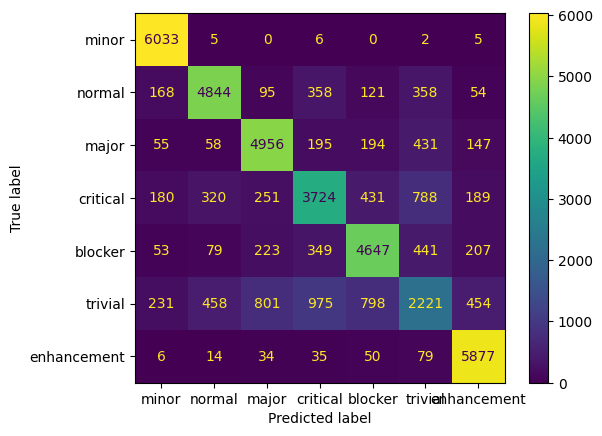

In [16]:
cm_display.plot()
plt.show()


In [17]:
#pikcle the model and put into the jar
import pickle
pickle.dump(model, open('pickle_jar/rf_model.pkl', 'wb'))
pickle.dump(vectorizer, open('pickle_jar/rf_vect.pkl', 'wb'))

